## Business Problem

- This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

## Importing Libraries and warnings

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
#To view all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Reading Datasets

In [107]:
#reading application dataset
adf=pd.read_csv('application_data.csv')

#reading previous application dataset
pdf=pd.read_csv('previous_application.csv')

## Inspecting Dataframes

In [108]:
#shape
adf.shape

(307511, 122)

In [109]:
adf.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [110]:
#Describe
adf.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [111]:
adf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## Checking null values

In [112]:
null_per=round(adf.isnull().sum()/len(adf)*100,4)
null_per

SK_ID_CURR                       0.0000
TARGET                           0.0000
NAME_CONTRACT_TYPE               0.0000
CODE_GENDER                      0.0000
FLAG_OWN_CAR                     0.0000
FLAG_OWN_REALTY                  0.0000
CNT_CHILDREN                     0.0000
AMT_INCOME_TOTAL                 0.0000
AMT_CREDIT                       0.0000
AMT_ANNUITY                      0.0039
AMT_GOODS_PRICE                  0.0904
NAME_TYPE_SUITE                  0.4201
NAME_INCOME_TYPE                 0.0000
NAME_EDUCATION_TYPE              0.0000
NAME_FAMILY_STATUS               0.0000
NAME_HOUSING_TYPE                0.0000
REGION_POPULATION_RELATIVE       0.0000
DAYS_BIRTH                       0.0000
DAYS_EMPLOYED                    0.0000
DAYS_REGISTRATION                0.0000
DAYS_ID_PUBLISH                  0.0000
OWN_CAR_AGE                     65.9908
FLAG_MOBIL                       0.0000
FLAG_EMP_PHONE                   0.0000
FLAG_WORK_PHONE                  0.0000


In [113]:
nullcol=null_per[null_per.values>=40]
nullcol.count()

49

#### There are 49 columns where the percentage of null values is greater than 40%

- We need to drop these columns since null value percentage is high

In [114]:
nullcol.values

array([65.9908, 56.3811, 50.7497, 58.516 , 48.781 , 66.4978, 69.8723,
       53.296 , 50.3488, 49.7608, 67.8486, 59.3767, 68.355 , 50.1933,
       69.433 , 55.1792, 50.7497, 58.516 , 48.781 , 66.4978, 69.8723,
       53.296 , 50.3488, 49.7608, 67.8486, 59.3767, 68.355 , 50.1933,
       69.433 , 55.1792, 50.7497, 58.516 , 48.781 , 66.4978, 69.8723,
       53.296 , 50.3488, 49.7608, 67.8486, 59.3767, 68.355 , 50.1933,
       69.433 , 55.1792, 68.3862, 50.1761, 48.2685, 50.8408, 47.3983])

In [115]:
# Removing those 49 columns
nullcol_list = list(nullcol.index)

#creating a new dataframe by removing the columns
df=adf.drop(labels=nullcol_list,axis=1)

In [116]:
df.shape

(307511, 73)

In [117]:
df.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,NaN,248526,158774,218391,196432,272868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55186,NaN,NaN,NaN,53901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,NaN,NaN,NaN,NaN,NaN,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,NaN,2.152665,2.052463,2.031521,NaN,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,NaN,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05

In [118]:
null_per[null_per.values<15]

SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0039
AMT_GOODS_PRICE                 0.0904
NAME_TYPE_SUITE                 0.4201
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
DAYS_REGISTRATION               0.0000
DAYS_ID_PUBLISH                 0.0000
FLAG_MOBIL                      0.0000
FLAG_EMP_PHONE                  0.0000
FLAG_WORK_PHONE                 0.0000
FLAG_CONT_MOBILE                0.0000
FLAG_PHONE               

### DF is new application dataframe without columns having >=40% of null values
- Ignoring AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR since it seems that these does not have that much business significance in our analysis

### Columns with null value % <= 13%
- We will check for possible imputation

In [119]:
less_null=null_per[(null_per.values<=13)&(null_per.values>0)]
less_null.count()

10

In [120]:
lessnull_list=list(less_null.index)
lessnull_list

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

- Checking relevant columns for imputation and outliers

### Checking the AMT_ANNUITY column

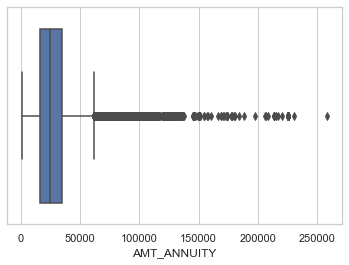

In [121]:
#Checking for outliers by boxplot
sns.boxplot(df['AMT_ANNUITY'])
plt.show()

#### There are outliers in AMT_ANNUITY column
- Since, it is a continuous variable, using median to impute null values

In [122]:
annuity_imp = round(df['AMT_ANNUITY'].median(),2)
df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=annuity_imp

In [123]:
#Checking for null values in the AMT_ANNUITY coulumn
df['AMT_ANNUITY'].isnull().sum()

0

### Checking the CNT_FAM_MEMBERS column

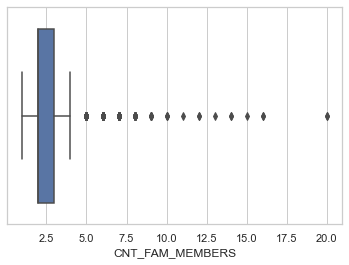

In [124]:
#Checking for outliers by boxplot
sns.boxplot(df['CNT_FAM_MEMBERS'])
plt.show()

#### There are outliers in CNT_FAM_MEMBERS column
- Using median to impute null values

In [125]:
CNT_FAM_imp = round(df['CNT_FAM_MEMBERS'].median(),2)
df.loc[df['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS']=CNT_FAM_imp

In [126]:
#Checking for null values in the CNT_FAM_MEMBERS coulumn
df['CNT_FAM_MEMBERS'].isnull().sum()

0

### Checking the AMT_GOODS_PRICE column

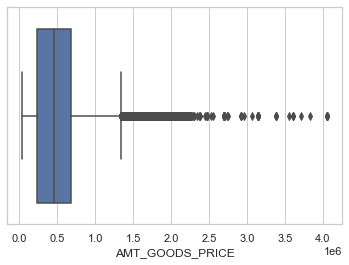

In [127]:
#Checking for outliers by boxplot
sns.boxplot(df['AMT_GOODS_PRICE'])
plt.show()

#### There are outliers in AMT_GOODS_PRICE column
- Using median to impute null values

In [128]:
AMT_GOODS_imp = round(df['AMT_GOODS_PRICE'].median(),2)
df.loc[df['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=AMT_GOODS_imp

In [129]:
#Checking for null values in the AMT_GOODS_PRICE coulumn
df['AMT_GOODS_PRICE'].isnull().sum()

0

## Checking columns with unknown values

In [130]:
#Checking CODE_GENDER column
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

- It contains 4 unknown values 'XNA'
- Imputing these 4 values to F as no. of F is considerably high.

In [131]:
df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [132]:
#Checking ORGANIZATION_TYPE column
df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

- There are 55374 unknown values present, i.e, 'XNA'
- Dropping these rows from the dataframe as they are not of any relevance and won't affect the analysis much

In [133]:
df=df[~(df['ORGANIZATION_TYPE']=='XNA')]
df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [134]:
#Checking the shape of our application dataset 'df'
df.shape

(252137, 73)

### Removing some columns which are of no or less significance

In [135]:
#Columns which are not required

not_req=['NAME_TYPE_SUITE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=not_req,axis=1,inplace=True)

In [136]:
df.shape

(252137, 48)

In [137]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHON

## Creating bins for further analysis

In [138]:
# binning for AMT_INCOME_TOTAL

bins_inc = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
label_inc = ["0-25000","25000-50000","50000-75000","75000-100000","100000-125000","125000-150000","150000-175000","175000-200000",
       "200000-225000","225000-250000","250000-275000","275000-300000","300000-325000","325000-350000","350000-375000",
       "375000-400000","400000-425000","425000-450000","450000-475000","475000-500000","500000 and above"]

df['AMT_INCOME_GROUP']=pd.cut(df['AMT_INCOME_TOTAL'],bins_inc,labels=label_inc)

In [139]:
# binning for AMT_CREDIT

bins_cred = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
label_cred = ["0-150000", "150000-200000","200000-250000", "250000-300000", "300000-350000", "350000-400000","400000-450000",
        "450000-500000","500000-550000","550000-600000","600000-650000","650000-700000","700000-750000","750000-800000",
        "800000-850000","850000-900000","900000 and above"]

df['AMT_CREDIT_GROUP']=pd.cut(df['AMT_CREDIT'],bins=bins_cred,labels=label_cred)

## Splitting dataframe df into two parts
- df_target1 for Defaulters, TARGET = 1
- df_target0 for Non-Defaulters, TARGET = 0

In [140]:
df_target1 = df[df['TARGET']==1]
df_target0 = df[df['TARGET']==0]

### Imbalance Ratio

In [141]:
imbalance=df.TARGET.value_counts(normalize=True)*100
round(imbalance)

0    91.0
1     9.0
Name: TARGET, dtype: float64

In [142]:
imbalance_ratio=91/9
print("Imbalance ratio (Defaulters/Non-Defaulters) = ", (round(imbalance_ratio,2)))

Imbalance ratio (Defaulters/Non-Defaulters) =  10.11


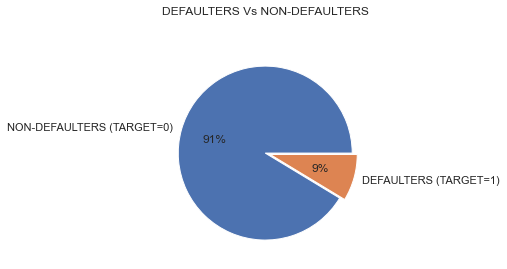

In [143]:
plt.pie(imbalance,labels=['NON-DEFAULTERS (TARGET=0)','DEFAULTERS (TARGET=1)'],explode=(0,0.06),autopct='%1.f%%')
plt.title('DEFAULTERS Vs NON-DEFAULTERS')
plt.show()


- There is data imbalance between DEFAULTERS Vs NON-DEFAULTERS.
- Approximately 91% of people are non-defaulters where as 9% people are deaulters.
- Imbalance ratio (Defaulters/Non-Defaulters) =  10.11

## Categorical Univariate Analysis

In [144]:
# Funtion for count plot in logarithmic scale

def univplot(df,col,title,hue=None):
    
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.titlepad'] = 28
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 5*len(temp.unique())
    fig.set_size_inches(width , 9)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='Greens') 
        
    plt.show()

#### For Target = 0

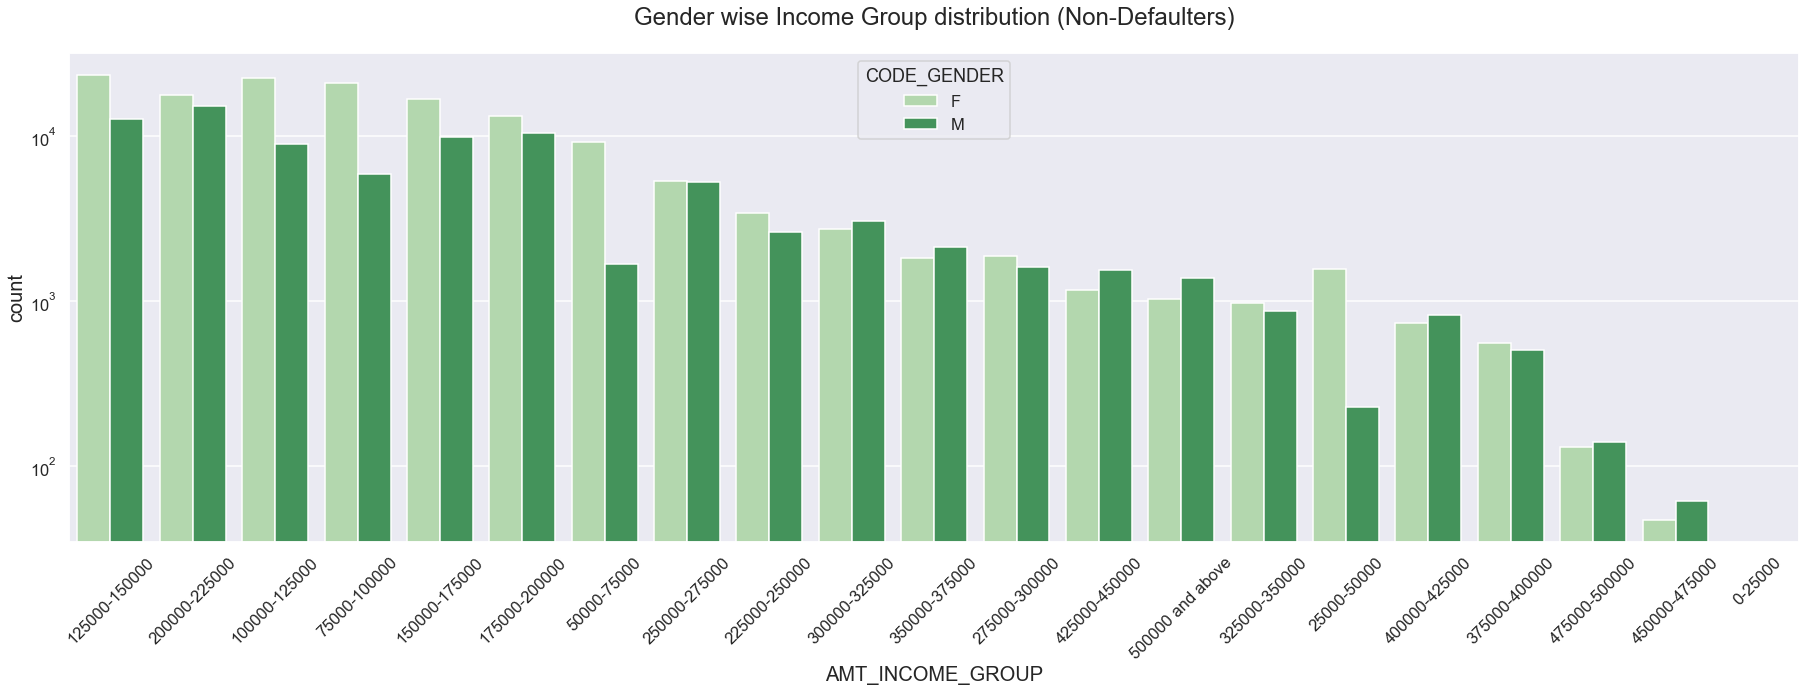

In [145]:
#Count plot for AMT_INCOME_GROUP
univplot(df_target0,'AMT_INCOME_GROUP','Gender wise Income Group distribution (Non-Defaulters)',hue='CODE_GENDER')

#### Insights from the plot

- Number of females are more than males in that particular income range.
- 100000 to 200000 Income group is having more number of credits.
- There are very less people with income more than 400000.
- More females applying for loan.

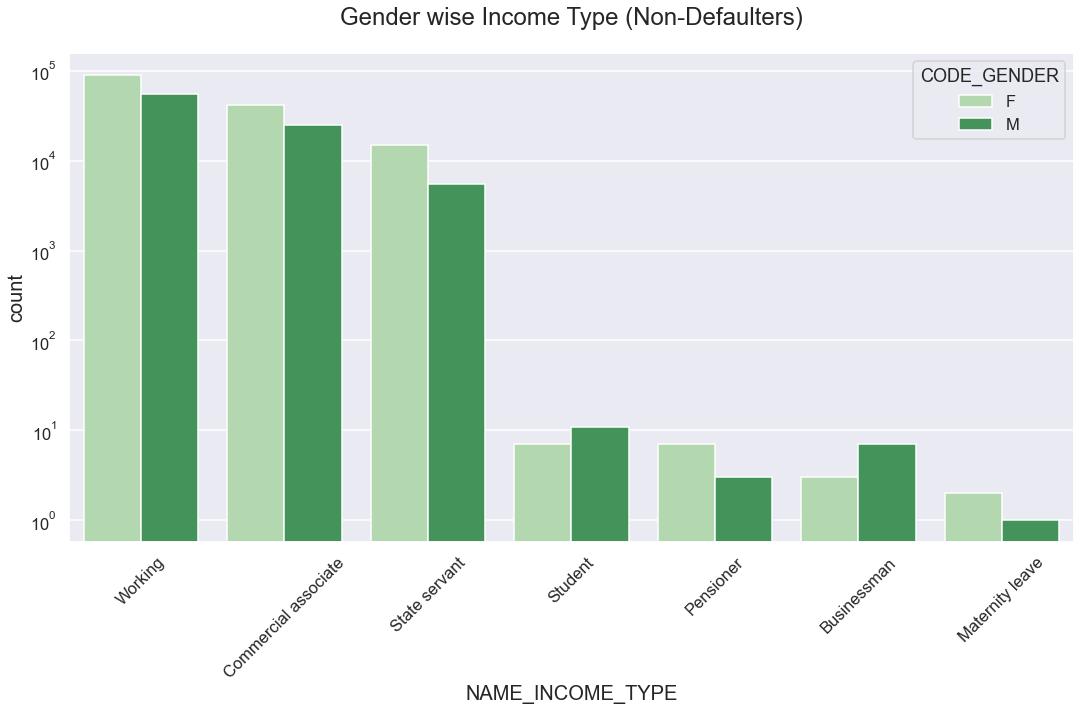

In [146]:
#Count plot for NAME_INCOME_TYPE

univplot(df_target0,'NAME_INCOME_TYPE','Gender wise Income Type (Non-Defaulters)',hue='CODE_GENDER')


- For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
- Again Females have more credits than male.
- income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’ has Less number of credits.

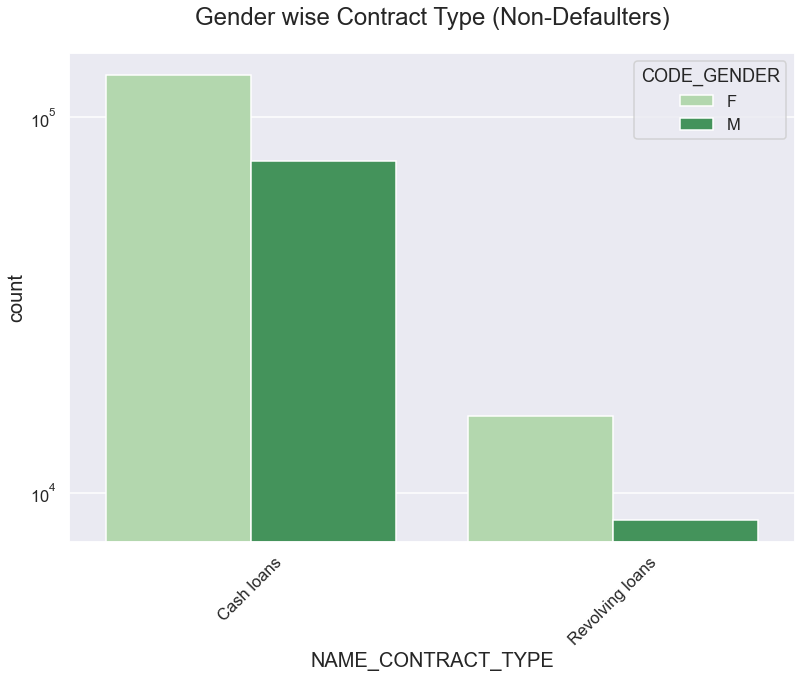

In [147]:
#Count plot for NAME_CONTRACT_TYPE
univplot(df_target0,'NAME_CONTRACT_TYPE','Gender wise Contract Type (Non-Defaulters)',hue='CODE_GENDER')

- As per the plot,‘cash loans’ have more credits than ‘Revolving loans’ contract type.
- Again Female are more in number for applying credits.

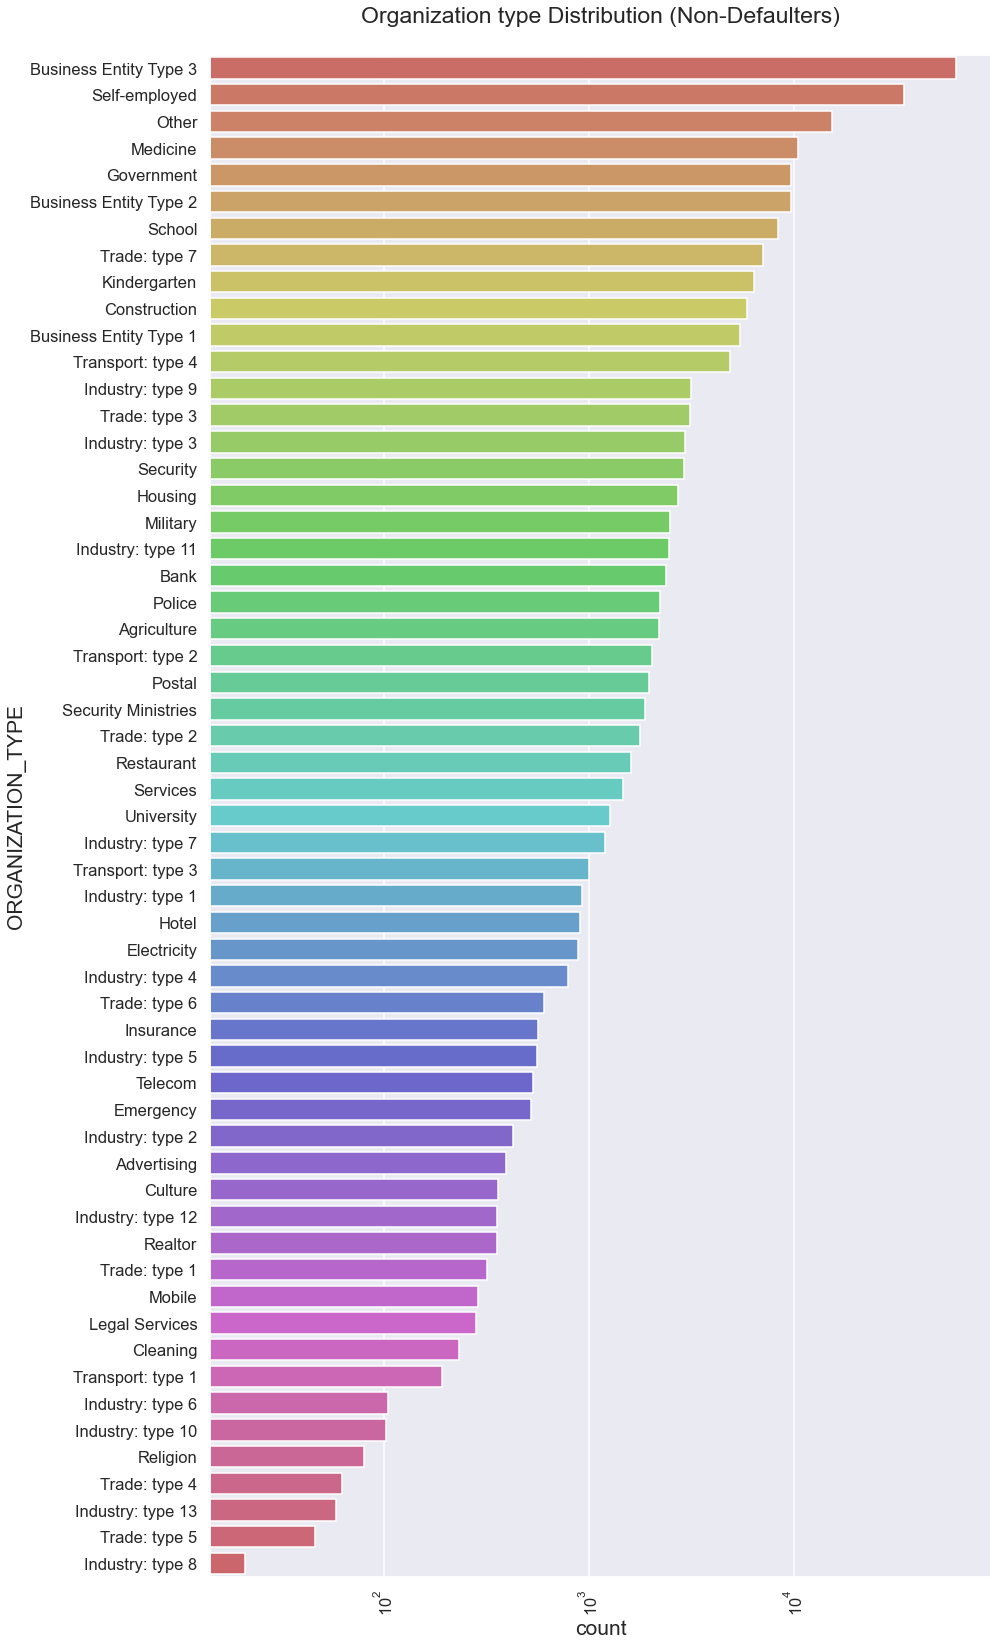

In [148]:
#Function for plotting Organization type in logarithmic scale

sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(14,28))
plt.rcParams["axes.labelsize"] = 21
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['axes.titlepad'] = 32

plt.title("Organization type Distribution (Non-Defaulters)")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=df_target0,y='ORGANIZATION_TYPE',order=df_target0['ORGANIZATION_TYPE'].value_counts().index,palette='hls')

plt.show()

- Organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’ have the max amount of people who applied for loan.
- Organization type 8,type 6, type 10, religion and trade type 5, type 4 have least amount of people.

### For Target=1

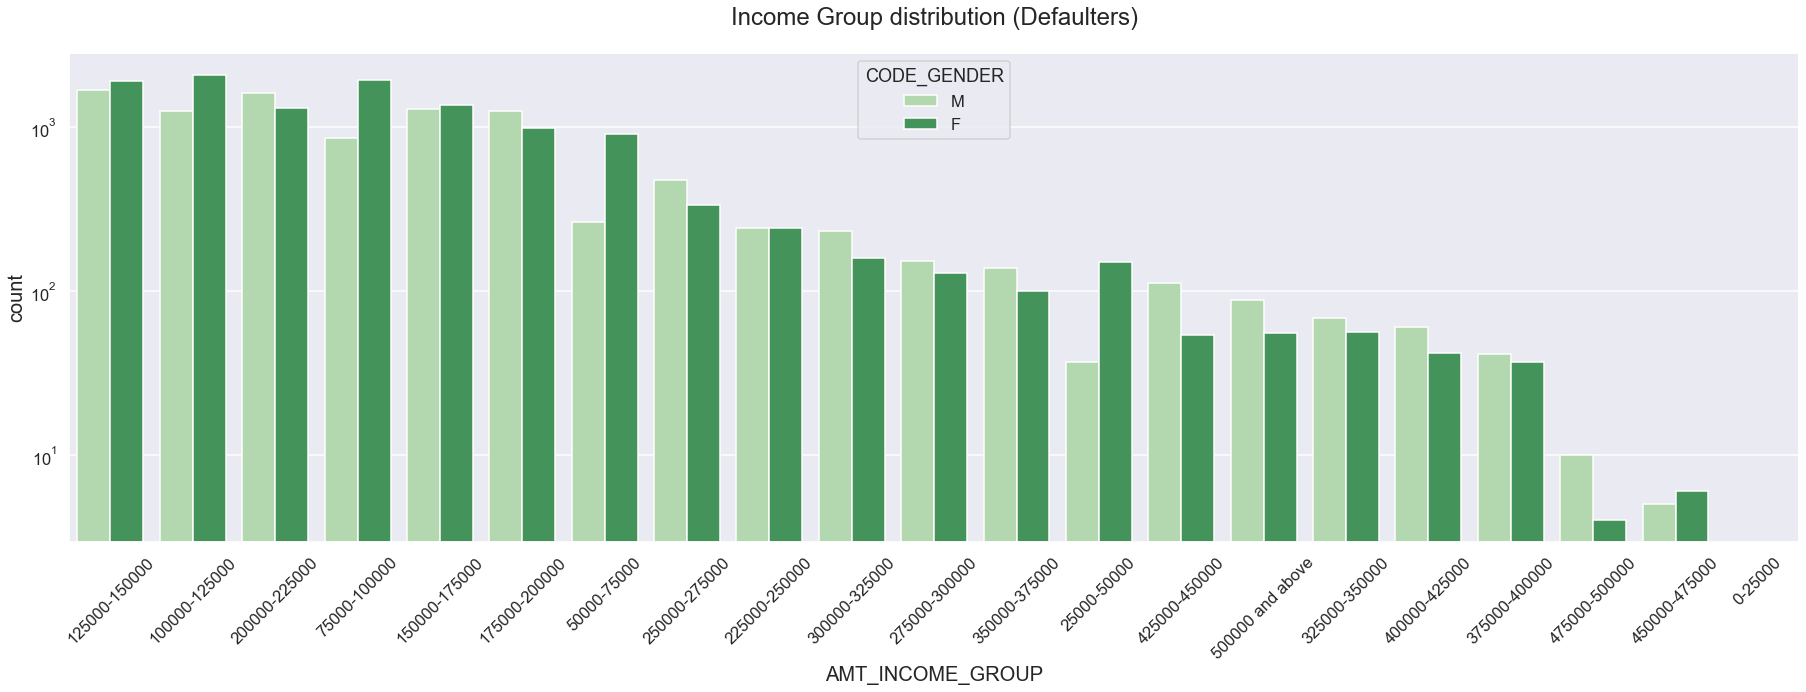

In [149]:
# Count plot for income range

univplot(df_target1,col='AMT_INCOME_GROUP',title='Income Group distribution (Defaulters)',hue='CODE_GENDER')

- Number of males are more than fe in that particular income range.
- 100000 to 200000 Income group is having more number of credits.
- There are very less people with income more than 400000.
- Male population is more likely to default the loan.

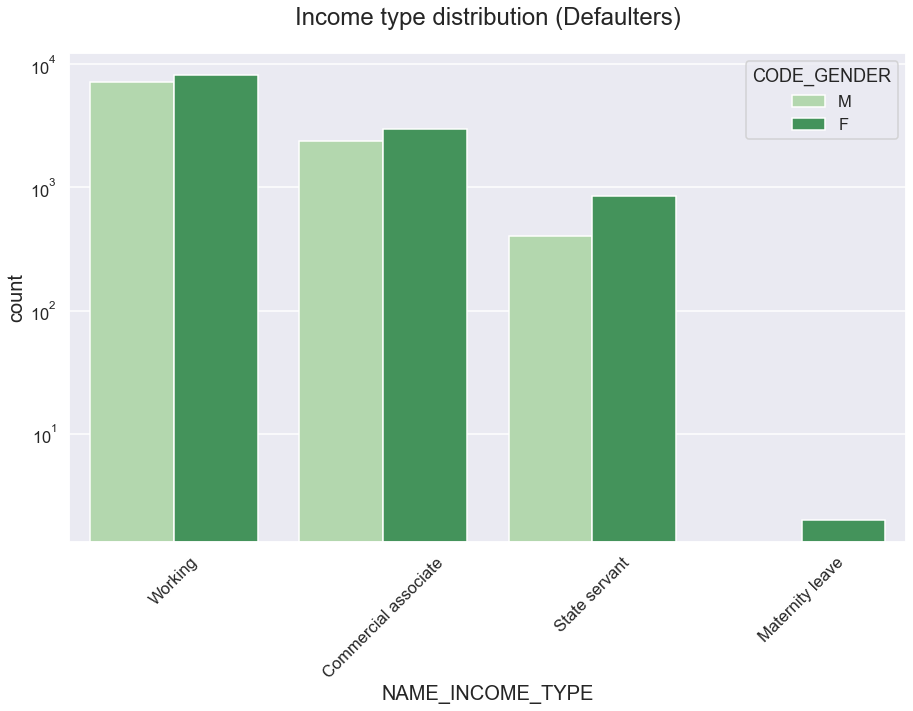

In [150]:
# Count plot for Income type

univplot(df_target1,col='NAME_INCOME_TYPE',title='Income type distribution (Defaulters)',hue='CODE_GENDER')

- For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
- Females have more credits than male.
- As per the plot, for Target=1: ‘student’ , ’pensioner’ and ‘Businessman’ are absent, which means they pay their installments on time.

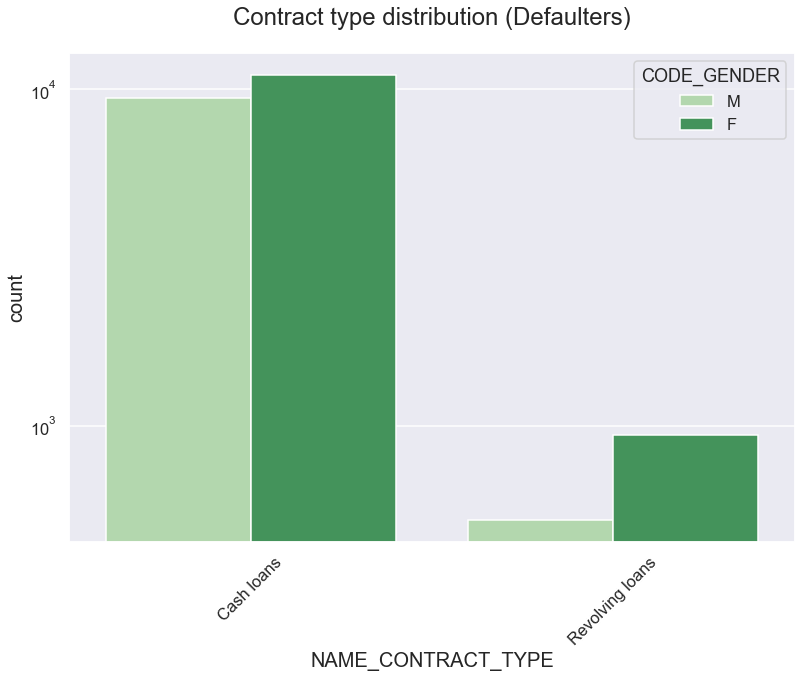

In [151]:
# Count for Contract type

univplot(df_target1,col='NAME_CONTRACT_TYPE',title='Contract type distribution (Defaulters)',hue='CODE_GENDER')

- As per the plot,‘cash loans’ have more credits than ‘Revolving loans’ contract type.
- Again Female are more in number for applying credits.
- For Target=1 : Proportion of Female Revolving loans is much higher than males.

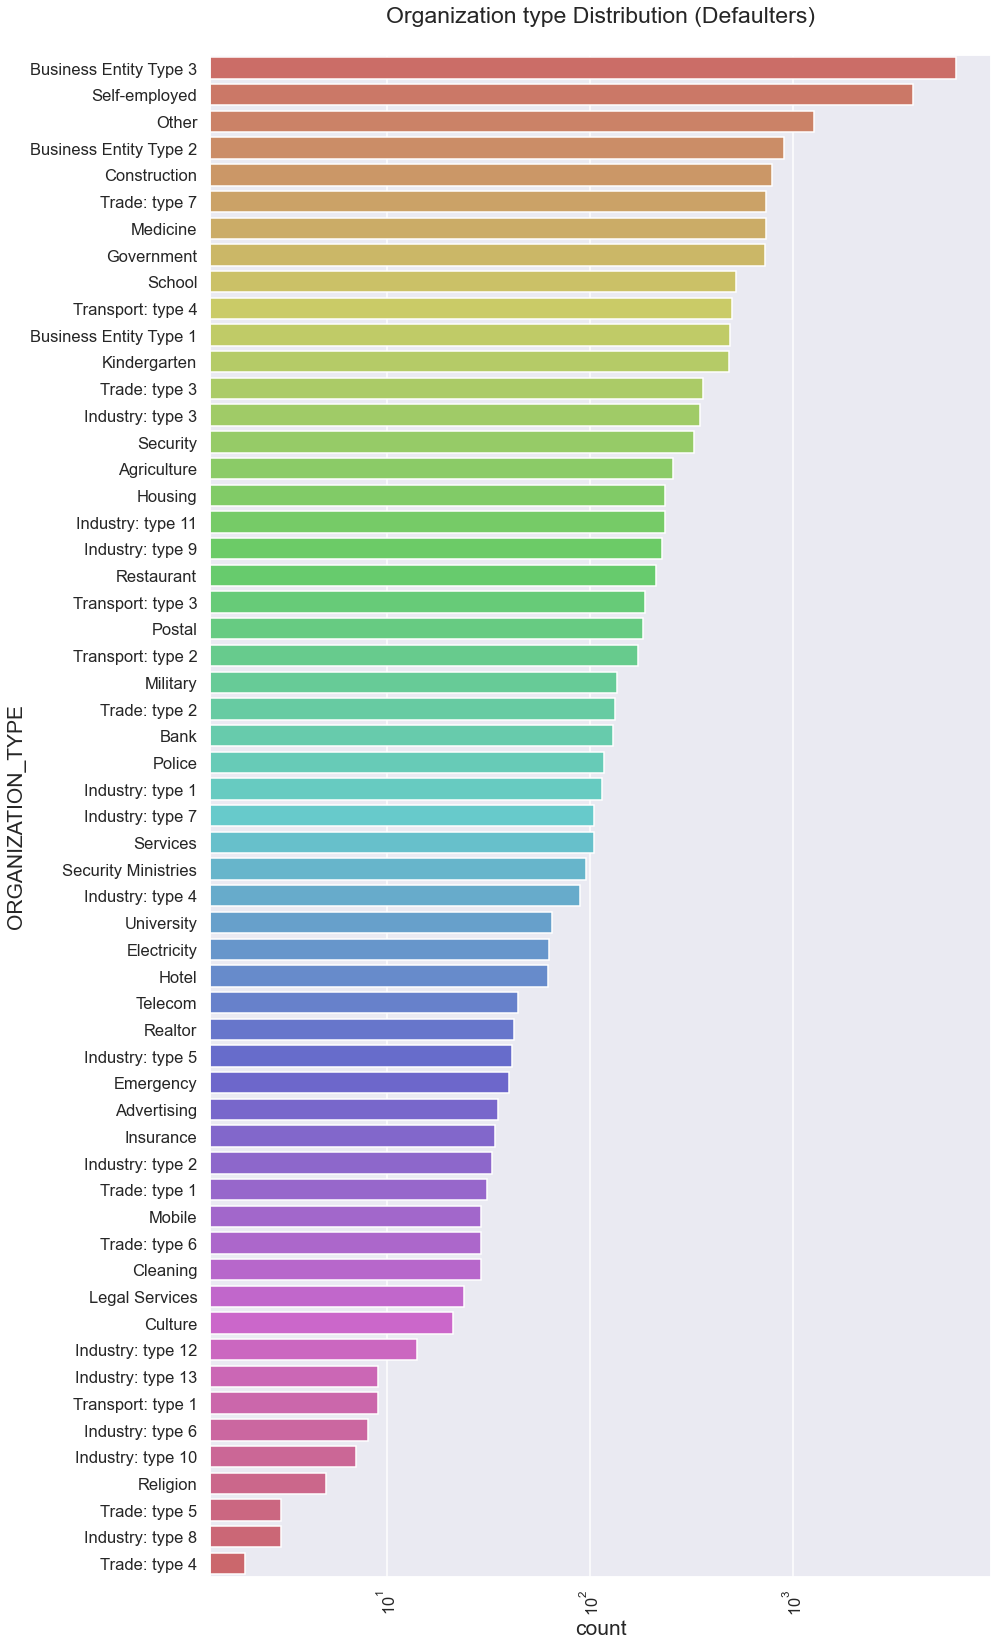

In [152]:
#Function for plotting Organization type in logarithmic scale

sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(14,28))
plt.rcParams["axes.labelsize"] = 21
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['axes.titlepad'] = 32

plt.title("Organization type Distribution (Defaulters)")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=df_target1,y='ORGANIZATION_TYPE',order=df_target1['ORGANIZATION_TYPE'].value_counts().index,palette='hls')

plt.show()

- Organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’ have the max amount of people who applied for loan.
- Organization type 8,type 6, type 10, religion and trade type 5, type 4 have least amount of people.

### Continuous Univariate Analysis

In [153]:
def uni_dist(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
    
    sns.distplot(a=df_target0[var],ax=ax1,color='blue')

    ax1.set_title(f'Distribution of {var} (Non-Defaulters)',fontsize=16)
            
    sns.distplot(a=df_target1[var],ax=ax2,color='blue')
    ax2.set_title(f'Distribution of {var} (Defaulters)',fontsize=16)    
        
    plt.show()

In [154]:
## Adding one column of ratio of AMT_CREDIT and AMT_INCOME_TOTAL

# For df_target0
df_target0['RATIO_CREDIT_INCOME']=round((df_target0['AMT_CREDIT']/df_target0['AMT_INCOME_TOTAL']))

#For df_target1
df_target1['RATIO_CREDIT_INCOME']=round((df_target1['AMT_CREDIT']/df_target1['AMT_INCOME_TOTAL']))

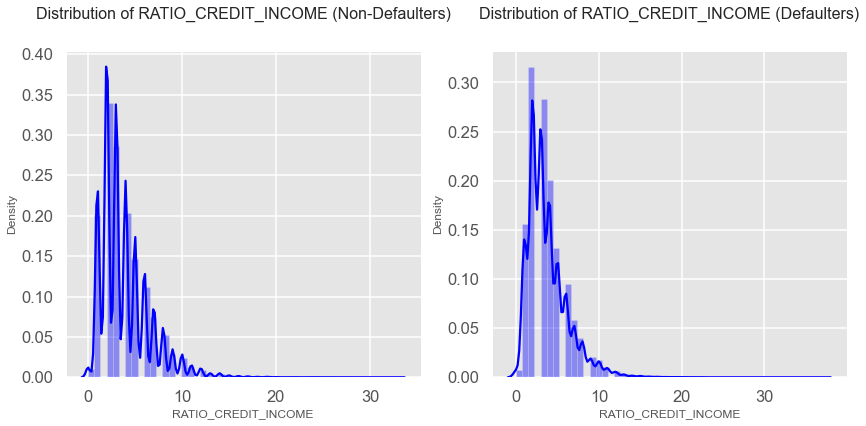

In [155]:
uni_dist('RATIO_CREDIT_INCOME')

- There are more people in non-defaulters with credit/income ratio between 0-20

In [156]:
df_target1['CNT_FAM_MEMBERS'].value_counts()

2.0     10193
1.0      4620
3.0      4526
4.0      2104
5.0       324
6.0        53
8.0         6
7.0         6
11.0        1
10.0        1
13.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

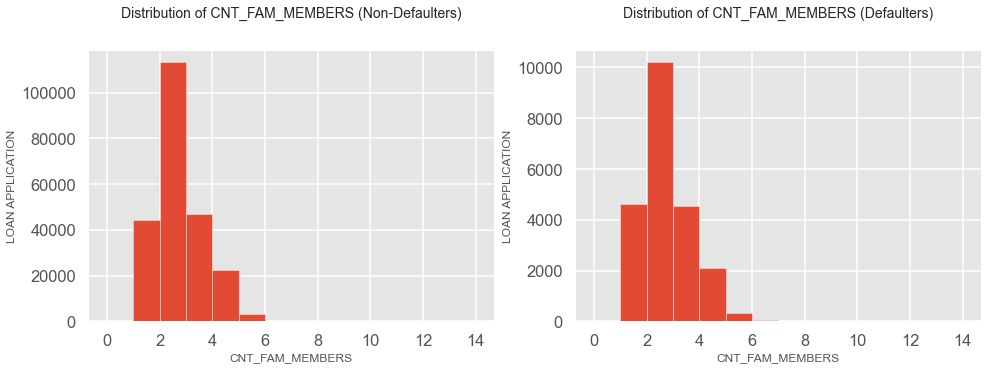

In [157]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
df_target0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS (Non-Defaulters)',fontsize=14)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION')

plt.subplot(1, 2, 2)
df_target1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS (Defaulters)',fontsize=14)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION')  

plt.show()

- Family with 3 people applies for loan more the other families.

In [158]:
# Finding correlation between top 10 relevant columns

corr_target0=df_target0.loc[0:,['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_EMPLOYED',
                            'DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','CNT_CHILDREN','REGION_RATING_CLIENT',
                            'AMT_GOODS_PRICE','DAYS_BIRTH']]

corr_target1=df_target1.loc[0:,['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','DAYS_EMPLOYED',
                            'DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','CNT_CHILDREN','REGION_RATING_CLIENT',
                            'AMT_GOODS_PRICE','DAYS_BIRTH']]

target_0=corr_target0.corr(method='spearman')
target_1=corr_target1.corr(method='spearman')

In [159]:
target_0

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,CNT_CHILDREN,REGION_RATING_CLIENT,AMT_GOODS_PRICE,DAYS_BIRTH
AMT_ANNUITY,1.000000,0.472204,0.826689,-0.074643,-0.027354,0.052969,-0.010795,-0.119092,0.823739,-0.100287
AMT_INCOME_TOTAL,0.472204,1.000000,0.403876,-0.060868,-0.036702,-0.011547,-0.021950,-0.216438,0.408319,-0.054666
AMT_CREDIT,0.826689,0.403876,1.000000,-0.104251,-0.038197,0.045682,-0.023652,-0.091606,0.984499,-0.169030
DAYS_EMPLOYED,-0.074643,-0.060868,-0.104251,1.000000,0.106823,-0.016041,0.030948,-0.017296,-0.109297,0.307787
DAYS_ID_PUBLISH,-0.027354,-0.036702,-0.038197,0.106823,1.000000,-0.108277,-0.119164,0.003188,-0.039771,0.083331
CNT_FAM_MEMBERS,0.052969,-0.011547,0.045682,-0.016041,-0.108277,1.000000,0.848231,0.039887,0.045293,0.172360
CNT_CHILDREN,-0.010795,-0.021950,-0.023652,0.030948,-0.119164,0.848231,1.000000,0.035561,-0.027084,0.266534
REGION_RATING_CLIENT,-0.119092,-0.216438,-0.091606,-0.017296,0.003188,0.039887,0.035561,1.000000,-0.094005,0.034891
AMT_GOODS_PRICE,0.823739,0.408319,0.984499,-0.109297,-0.039771,0.045293,-0.027084,-0.094005,1.000000,-0.169015
DAYS_BIRTH,-0.100287,-0.054666,-0.169030,0.307787,0.083331,0.172360,0.266534,0.034891,-0.169015,1.000000


In [160]:
target_1

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,CNT_CHILDREN,REGION_RATING_CLIENT,AMT_GOODS_PRICE,DAYS_BIRTH
AMT_ANNUITY,1.000000,0.428947,0.812093,-0.060193,-0.044128,0.062994,0.015133,-0.059905,0.805644,-0.100200
AMT_INCOME_TOTAL,0.428947,1.000000,0.364559,-0.053798,-0.051113,-0.029655,-0.039123,-0.163605,0.369080,-0.103026
AMT_CREDIT,0.812093,0.364559,1.000000,-0.107605,-0.065143,0.060267,0.000427,-0.050664,0.975458,-0.200718
DAYS_EMPLOYED,-0.060193,-0.053798,-0.107605,1.000000,0.104244,-0.044302,0.006823,-0.002877,-0.116043,0.256870
DAYS_ID_PUBLISH,-0.044128,-0.051113,-0.065143,0.104244,1.000000,-0.087486,-0.091042,0.005791,-0.069184,0.146246
CNT_FAM_MEMBERS,0.062994,-0.029655,0.060267,-0.044302,-0.087486,1.000000,0.845289,0.045607,0.058337,0.080812
CNT_CHILDREN,0.015133,-0.039123,0.000427,0.006823,-0.091042,0.845289,1.000000,0.048236,-0.005792,0.175025
REGION_RATING_CLIENT,-0.059905,-0.163605,-0.050664,-0.002877,0.005791,0.045607,0.048236,1.000000,-0.060755,0.046673
AMT_GOODS_PRICE,0.805644,0.369080,0.975458,-0.116043,-0.069184,0.058337,-0.005792,-0.060755,1.000000,-0.198796
DAYS_BIRTH,-0.100200,-0.103026,-0.200718,0.256870,0.146246,0.080812,0.175025,0.046673,-0.198796,1.000000


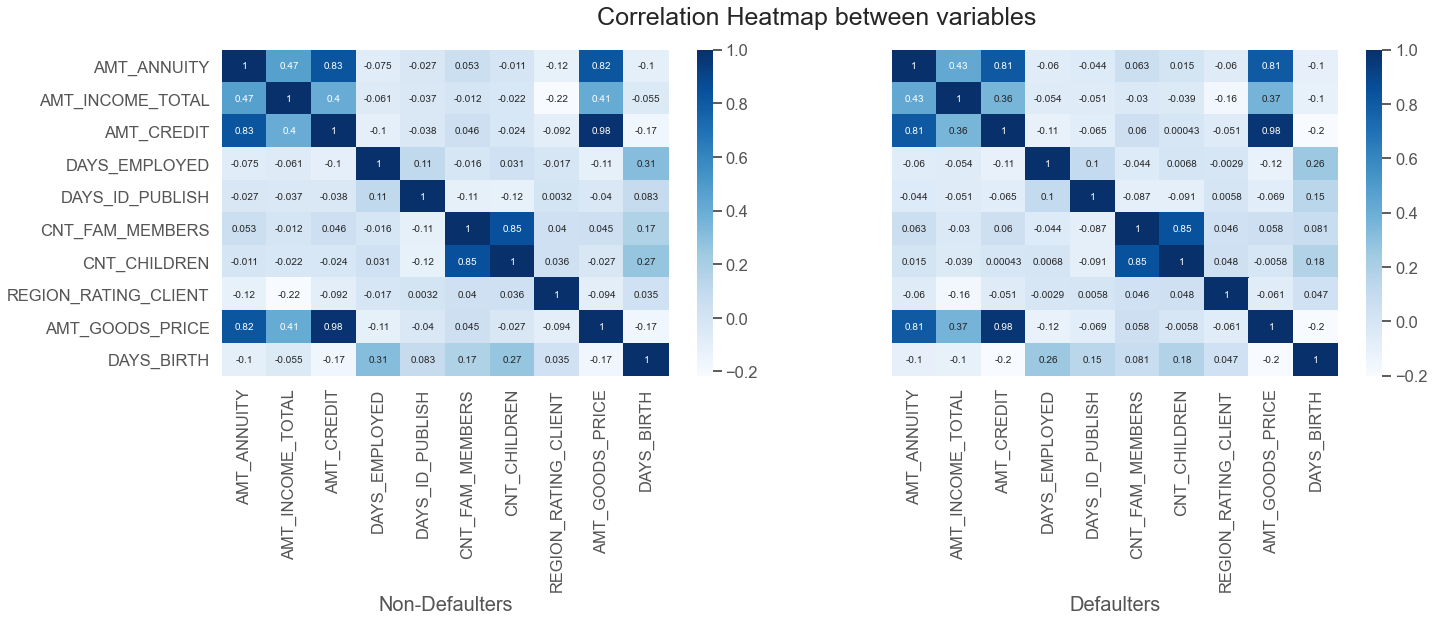

In [161]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=[22,6],sharey=True)
mv=sns.heatmap(data=target_0,cmap="Blues",ax=ax1,annot=True)
fv=sns.heatmap(data=target_1,cmap="Blues",ax=ax2,annot=True)

mv.set_xlabel('Non-Defaulters',fontsize=20)
fv.set_xlabel('Defaulters',fontsize=20)
plt.suptitle('Correlation Heatmap between variables',fontsize=25)
plt.show()

- Credit amount is inversely proportional to the date of birth, i.e, lower the age higher the credit amount.
- Credit amount is inversely proportional to the number of children client have, i.e, lesser the children higher the credit amount.
- Credit amount is inversely proportional to days employed, i.e, credit amount is higher for people who started job recently
- Income amount is inversely proportional to the number of children client have, i.e, people with less children have more income.


In [162]:
df.head()
df.shape

(252137, 50)

## Bivariate Analysis 
### For Target=1, Defaulters

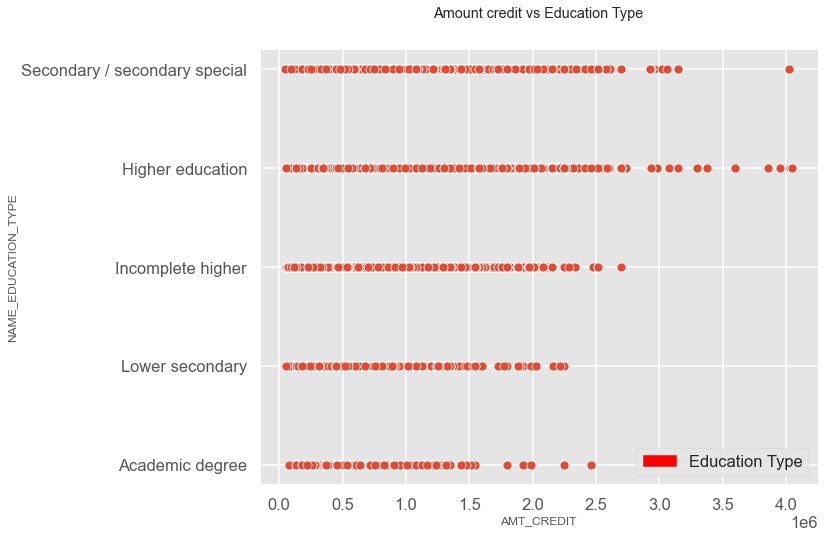

In [163]:
import matplotlib.patches as mpatches
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['AMT_CREDIT'],y=df['NAME_EDUCATION_TYPE'])
red_patch = mpatches.Patch(color='red', label='Education Type')
plt.legend(handles=[red_patch])
plt.title('Amount credit vs Education Type')
plt.show()


- From above scatter plot Amount credit vs Education type the 'Secondary special' and 'Higher education' have higher credit amount compare to other.

Text(0.5, 1.0, 'Credit amount vs Education')

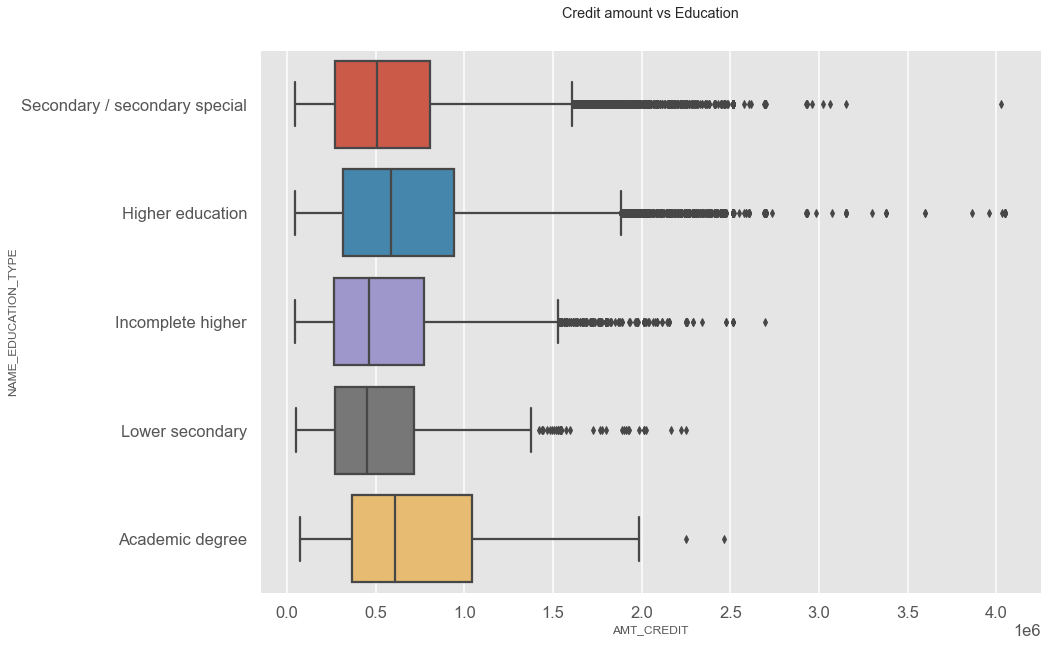

In [164]:
plt.figure(figsize=(14,10))
sns.boxplot(x=df['AMT_CREDIT'], y=df['NAME_EDUCATION_TYPE'])
plt.title('Credit amount vs Education')

- Higher Education have a more outliers than other education type. 'Acedimic Degree' have a more credit amount and lesser outliers. The median value of the 'Incomplete higher' and 'Lower secondary' are same.

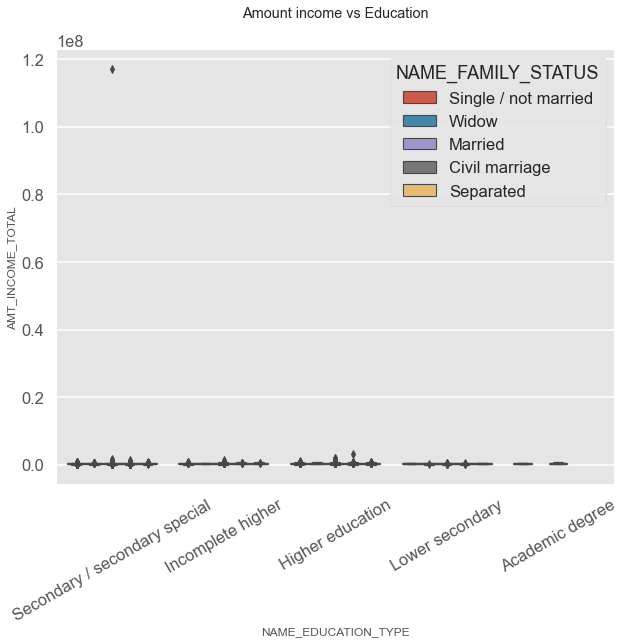

In [165]:
## Further we will draw more insights with the target_1.
plt.figure(figsize=(10,8))
plt.xticks(rotation=30)
sns.boxplot(data =df_target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Amount income vs Education')
plt.show()

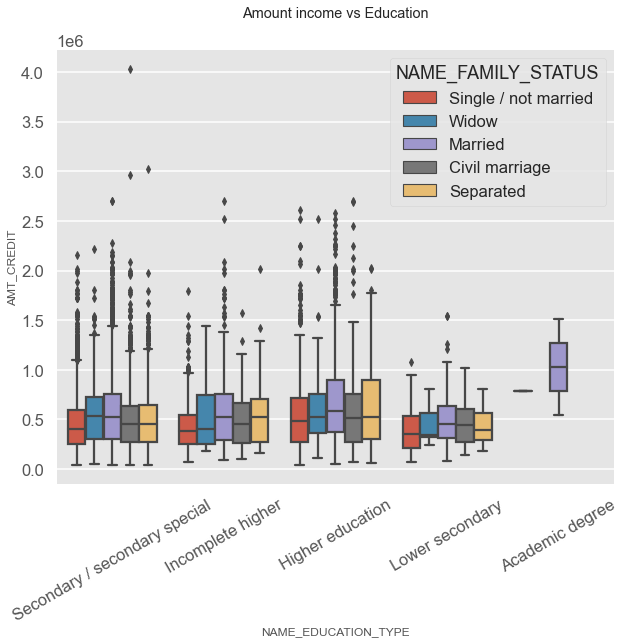

In [166]:
## Boxplot education type and amount credit with target_1.

plt.figure(figsize=(10,8))
plt.xticks(rotation=30)
sns.boxplot(data =df_target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Amount income vs Education')
plt.show()

- From the above box plot Higher education, Secondary/special and Incomplete_higher have a higher credit amount than others. In all the three only 'Married' have a more credit amount. In Acedemic_degree only Married have a credit amount.

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 360x360 with 0 Axes>

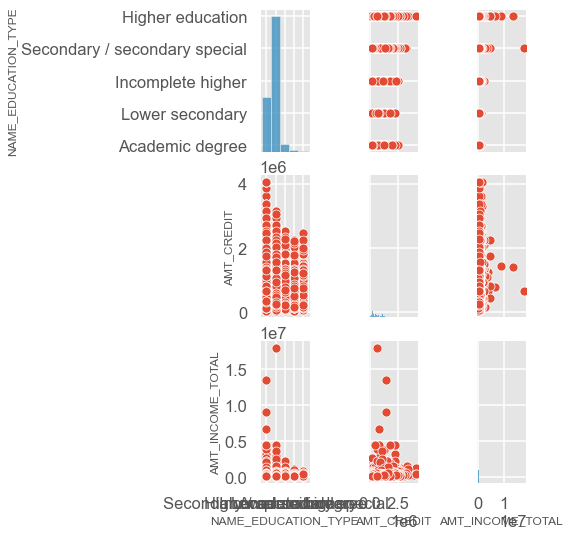

In [167]:
## Pairplot for Education_type Amount credit, Income amount

plt.figure(figsize=(5,5))
sns.pairplot(data =df_target0, vars=['NAME_EDUCATION_TYPE','AMT_CREDIT','AMT_INCOME_TOTAL'])
plt.show

- Above pairplot shows the pair between the 3 columns Education_type, Credit_Amount and Amount_total_Income.

### Bivariate analysis for for Target=0, Non-Defaulters

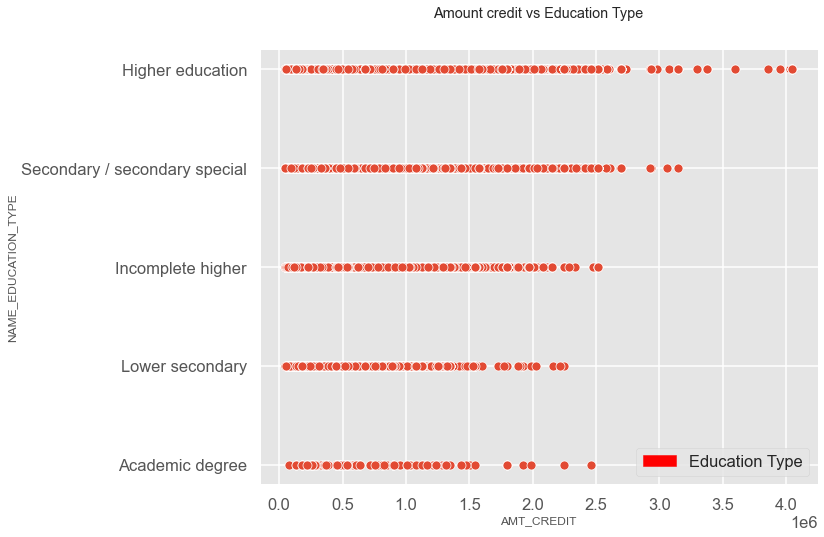

In [168]:
import matplotlib.patches as mpatches
plt.figure(figsize=(10,8))
sns.scatterplot(x=df_target0['AMT_CREDIT'],y=df_target0['NAME_EDUCATION_TYPE'])
red_patch = mpatches.Patch(color='red', label='Education Type')
plt.legend(handles=[red_patch])
plt.title('Amount credit vs Education Type')
plt.show()


- Higher_education have a higher credit amount where as lower secondary has a lower credit amount.

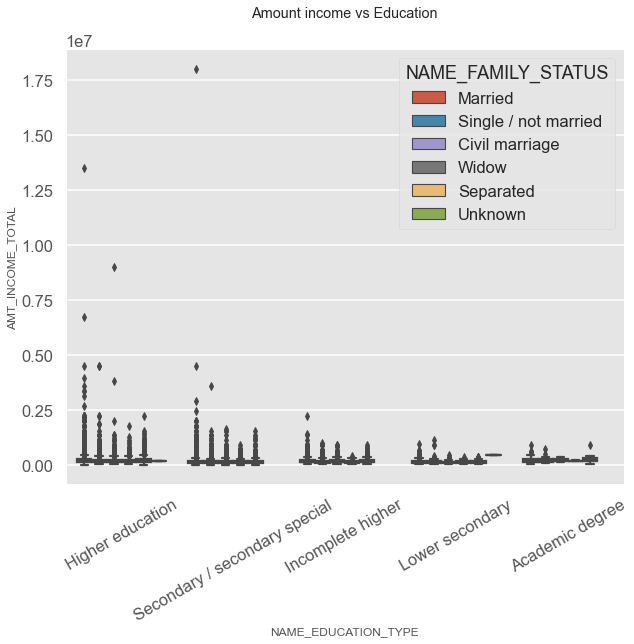

In [169]:
## Boxplot with target_0 

plt.figure(figsize=(10,8))
plt.xticks(rotation=30)
sns.boxplot(data =df_target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Amount income vs Education')
plt.show()

- In the target_0 data base 'Higher education' have a more outliers and 'Acedimic Degree' have a less outliers ans actual value. 

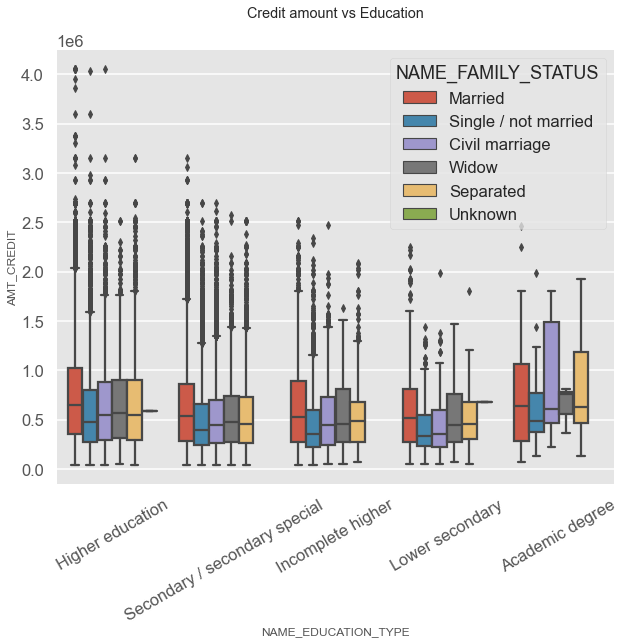

In [170]:
## Boxplot with target_0 Credit amount

plt.figure(figsize=(10,8))
plt.xticks(rotation=30)
sns.boxplot(data =df_target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education')
plt.show()

- Above boxplot shows from target_0 'Acedimic degree' have a higher credit amount 'and from family status 'Married', 'Seperated' and 'Civil marriage' have more credit amount than others. Other education type have a more outliers.

## Checking previous application data

In [171]:
pdf.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
pdf.shape

(1670214, 37)

In [173]:
#To check the null values

df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                41019
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
H

In [174]:
## Calculating the percentage of Null Values

df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMAIL                      0.000000
OCCUPATION_TYPE                16.268537
CNT_FAM_MEMBERS                 0.000000
REGION_RATING_CL

In [175]:
## Removing The null values having more than equal to 40%

df1= pdf.loc[:,pdf.isnull().mean()<=0.4]

In [176]:
## Imputing the null values with median as outliers are present.

missing_col=['CNT_PAYMENT','AMT_ANNUITY','AMT_GOODS_PRICE']
for i in missing_col:
    df1.loc[df1.loc[:,i].isnull(),i]=df1.loc[:,i].median()


In [177]:
previous_data.shape

(1670214, 26)

<AxesSubplot:xlabel='AMT_APPLICATION', ylabel='AMT_CREDIT'>

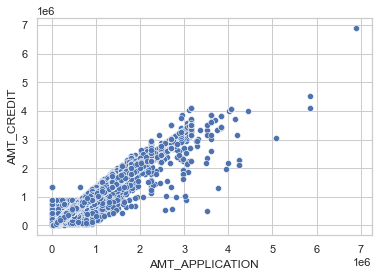

In [185]:
## To check the relation of application amount and amount credit

sns.scatterplot(x=previous_data['AMT_APPLICATION'],y=df1["AMT_CREDIT"])

- Above scatterplot shows the relation credit amount is same as the application amount.

## Merging the two data frames

- Merging application data and previous data, i.e df and previous_data

In [179]:
# Merging the Application dataset with previous dataset.

merge_df = pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [180]:
# Removing the columns which are not needed 

merge_df.drop(['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

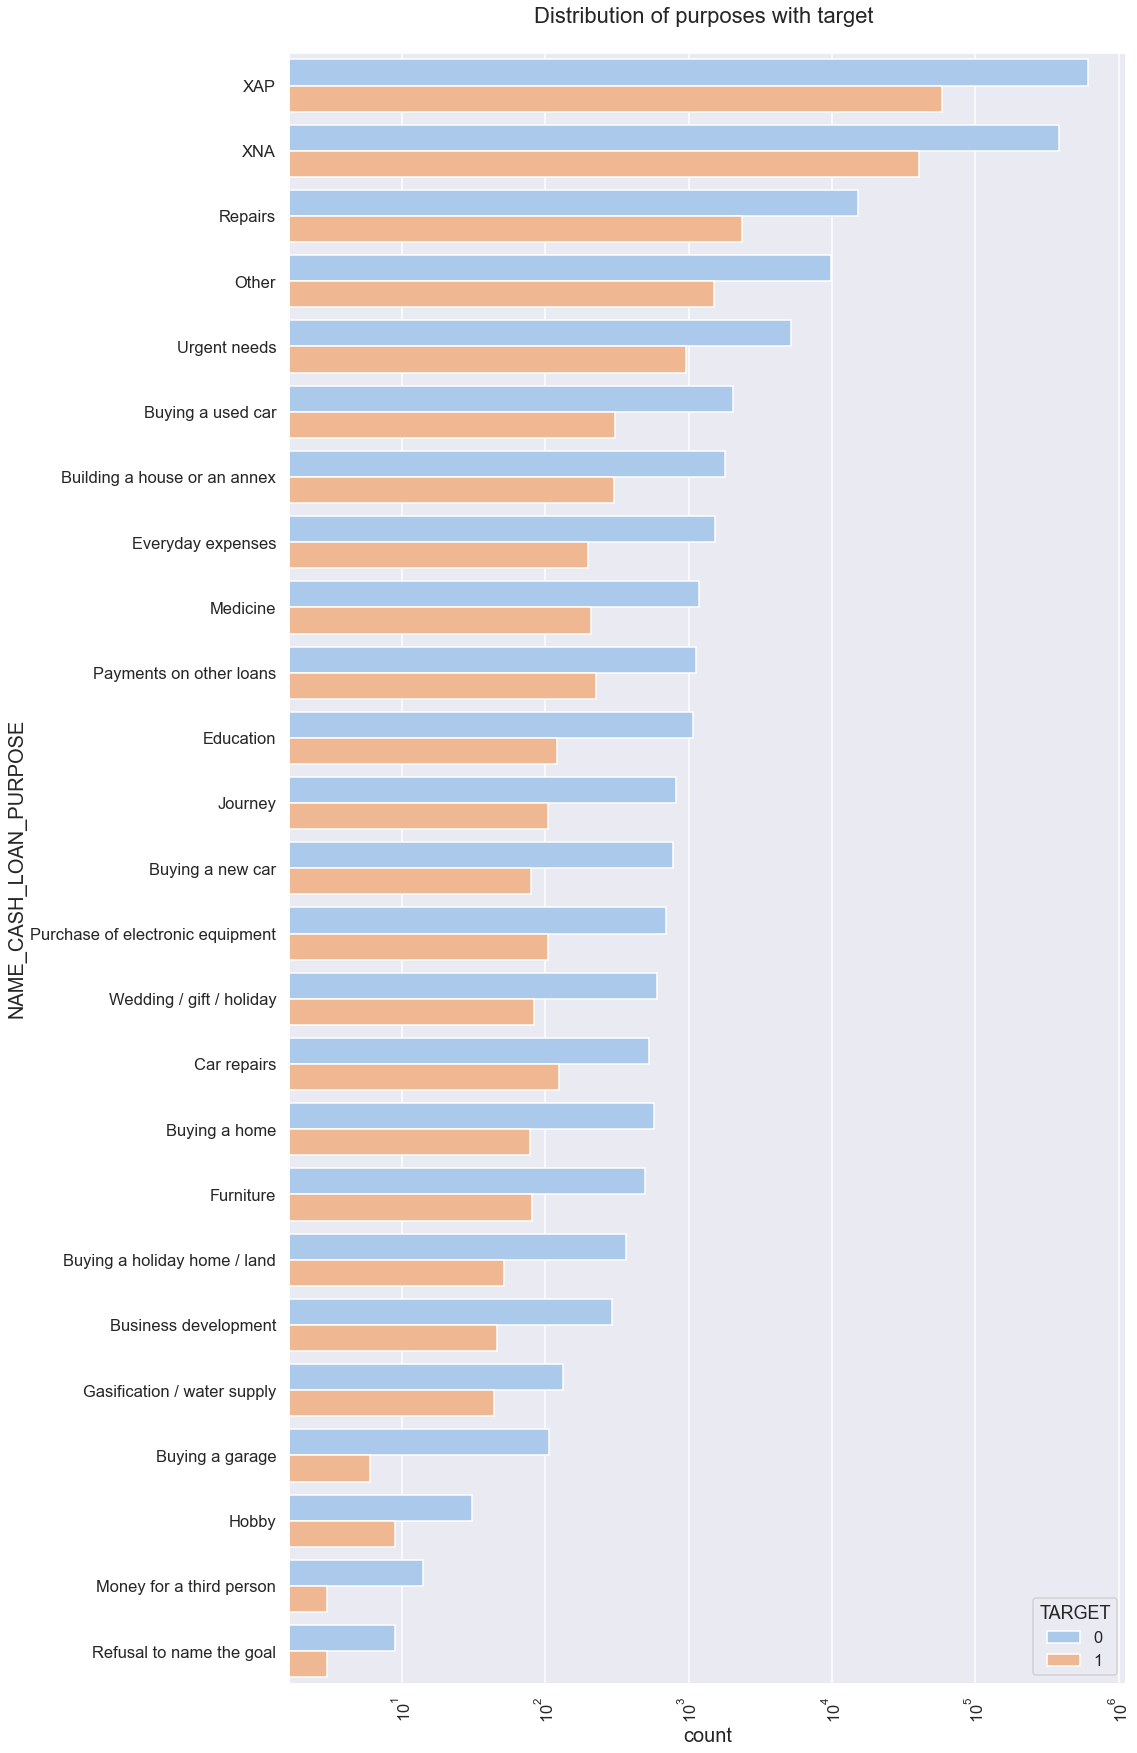

In [181]:
sns.set_style('darkgrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = merge_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='pastel')

- Repair purpose has the most rejection of loans.
- Education purposes has equal number of approves and rejection of loans.

In [182]:
def merged_data(Varx,Vary):
    plt.style.use('ggplot')
    sns.despine
    New_merge= merge_df.pivot_table(values='SK_ID_CURR', 
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    New_merge=New_merge.div(New_merge.sum(axis=1),axis='rows')*100
    sns.set()
    New_merge.plot(kind='bar',stacked=True,figsize=(13,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

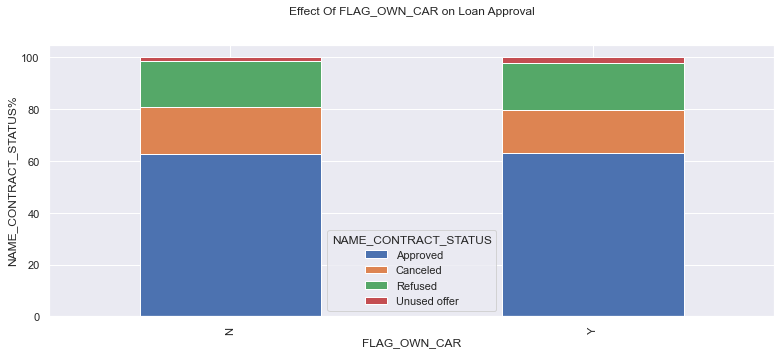

In [183]:
merged_data('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

- From the above plot, we can't say if car ownership have any effect on application approval or rejection.

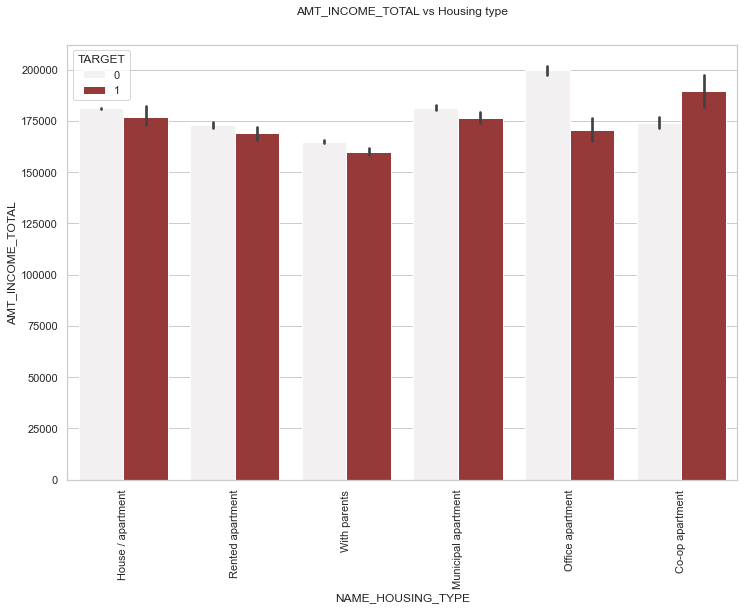

In [184]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(data =merge_df, y='AMT_INCOME_TOTAL',hue='TARGET',x='NAME_HOUSING_TYPE',color='Brown')
plt.title('AMT_INCOME_TOTAL vs Housing type')
plt.show()

- Barplot shows the comparison between target_0 and target_1 database. 
- From 'housing_type' co-op apartment have higher income amount. 
- On other side 'Office_apartment' form target_0 data have more amount income. 

### Conclusion

- Bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment instead Bank can focus on 'House apartment' and 'With parent' housing type.

- Bank should keep a note of people with income type ‘working’ are more likely to have irregular or unsuccessful payments.
